# 1 - Introduction

Name : Gilang Wiradhyaksa

Data : [AI Fruit and Real Fruit](https://www.kaggle.com/datasets/osmankagankurnaz/dataset-of-ai-generated-fruits-and-real-fruits/data)

# 2 - Import Libraries

In [87]:
# Import libraries

import os
import glob
import numpy as np
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import seaborn as sns
import tensorflow as tf
from pathlib import Path

from jmd_imagescraper.core import *

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential, load_model

import warnings
warnings.filterwarnings('ignore')

# 3 - Data Loading

In [3]:
# Listing images of each category

ai_files = glob.glob('dataset/ai/*')
real_files = glob.glob('dataset/real/*')

ai_files.sort()
real_files.sort()

print('ai_files : ', ai_files)
print('real_files : ', real_files)

ai_files :  ['dataset/ai\\green-apple-ohs-1.jpg', 'dataset/ai\\green-apple-ohs-10.jpg', 'dataset/ai\\green-apple-ohs-11.jpg', 'dataset/ai\\green-apple-ohs-12.jpg', 'dataset/ai\\green-apple-ohs-13.jpg', 'dataset/ai\\green-apple-ohs-14.jpg', 'dataset/ai\\green-apple-ohs-15.jpg', 'dataset/ai\\green-apple-ohs-16.jpg', 'dataset/ai\\green-apple-ohs-17.jpg', 'dataset/ai\\green-apple-ohs-18.jpg', 'dataset/ai\\green-apple-ohs-19.jpg', 'dataset/ai\\green-apple-ohs-2.jpg', 'dataset/ai\\green-apple-ohs-20.jpg', 'dataset/ai\\green-apple-ohs-21.jpg', 'dataset/ai\\green-apple-ohs-22.jpg', 'dataset/ai\\green-apple-ohs-23.jpg', 'dataset/ai\\green-apple-ohs-24.jpg', 'dataset/ai\\green-apple-ohs-25.jpg', 'dataset/ai\\green-apple-ohs-3.jpg', 'dataset/ai\\green-apple-ohs-4.jpg', 'dataset/ai\\green-apple-ohs-5.jpg', 'dataset/ai\\green-apple-ohs-6.jpg', 'dataset/ai\\green-apple-ohs-7.jpg', 'dataset/ai\\green-apple-ohs-8.jpg', 'dataset/ai\\green-apple-ohs-9.jpg', 'dataset/ai\\green-apple-ss-1.jpg', 'dataset/a

In [4]:
# Another way to load image
# Directory
main_path = 'dataset'

ai_dir = os.path.join(main_path, 'ai')
real_dir = os.path.join(main_path, 'real')

ai_glob= glob.glob(ai_dir + '/*.jpg')
real_glob= glob.glob(real_dir + '/*.jpg')

ai_glob.sort()
real_glob.sort()

print('ai_glob : ', ai_glob)
print('real_glob : ', real_glob)

ai_glob :  ['dataset\\ai\\green-apple-ohs-1.jpg', 'dataset\\ai\\green-apple-ohs-10.jpg', 'dataset\\ai\\green-apple-ohs-11.jpg', 'dataset\\ai\\green-apple-ohs-12.jpg', 'dataset\\ai\\green-apple-ohs-13.jpg', 'dataset\\ai\\green-apple-ohs-14.jpg', 'dataset\\ai\\green-apple-ohs-15.jpg', 'dataset\\ai\\green-apple-ohs-16.jpg', 'dataset\\ai\\green-apple-ohs-17.jpg', 'dataset\\ai\\green-apple-ohs-18.jpg', 'dataset\\ai\\green-apple-ohs-19.jpg', 'dataset\\ai\\green-apple-ohs-2.jpg', 'dataset\\ai\\green-apple-ohs-20.jpg', 'dataset\\ai\\green-apple-ohs-21.jpg', 'dataset\\ai\\green-apple-ohs-22.jpg', 'dataset\\ai\\green-apple-ohs-23.jpg', 'dataset\\ai\\green-apple-ohs-24.jpg', 'dataset\\ai\\green-apple-ohs-25.jpg', 'dataset\\ai\\green-apple-ohs-3.jpg', 'dataset\\ai\\green-apple-ohs-4.jpg', 'dataset\\ai\\green-apple-ohs-5.jpg', 'dataset\\ai\\green-apple-ohs-6.jpg', 'dataset\\ai\\green-apple-ohs-7.jpg', 'dataset\\ai\\green-apple-ohs-8.jpg', 'dataset\\ai\\green-apple-ohs-9.jpg', 'dataset\\ai\\green-ap

# 4 - Exploratory Data Analysis

## 4.1 - Data Distribution

In [5]:
counts = [len(ai_files), len(real_files)]
labels = ['AI Generated Fruit', 'Real Fruit']

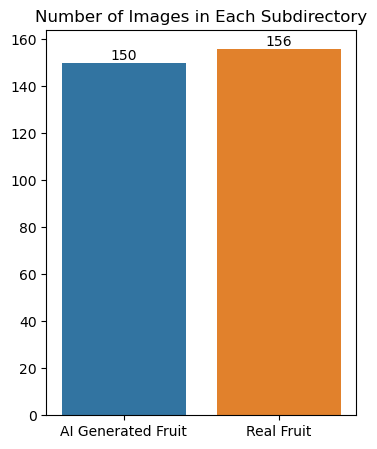

In [6]:
plt.subplots(figsize=(4, 5))
ax = sns.barplot(x=labels, y=counts, orient='v')
ax.bar_label(ax.containers[0])
ax.set(title='Number of Images in Each Subdirectory')
plt.show()

## 4.2 - Data Shape

In [7]:
random_index = np.random.randint(0, len(ai_files)-1)

img_ai_fruit = cv2.imread(ai_files[random_index])
img_real_fruit = cv2.imread(real_files[random_index])

print('Image in AI Generated Fruit shape:', img_ai_fruit.shape)
print('Image in Real Fruit shape:', img_real_fruit.shape)

Image in AI Generated Fruit shape: (2048, 2048, 3)
Image in Real Fruit shape: (2240, 3984, 3)


## 4.3 - Visualize Data

In [8]:
def random_sample(image_files, num_samples=5):
  random_files= random.sample(image_files, num_samples)
  return random_files

In [9]:
random_ai_fruit = random_sample(ai_files)
random_real_fruit = random_sample(real_files)

In [10]:
def visualize_img(random_data, labels=None):
  fig, axes= plt.subplots(1,5, figsize=(15,12))
  for i, image_path in enumerate(random_data):
    image = plt.imread(image_path)
    axes[i].imshow(image) # bisa tanpa cmap kalau bener2 RGB
    axes[i].set_title(f'{labels}, {image.shape}')
    axes[i].axis('off')
  plt.show()

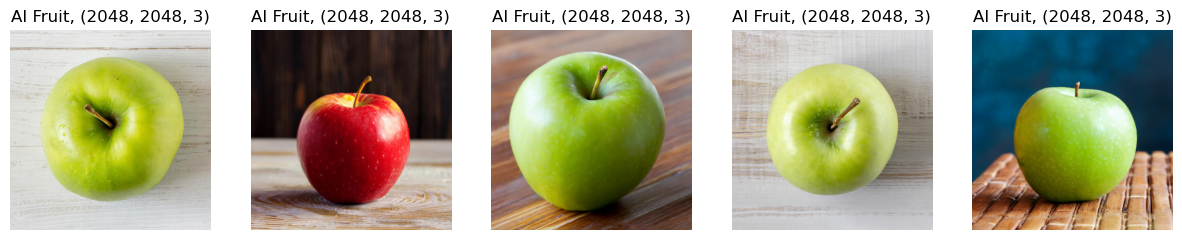

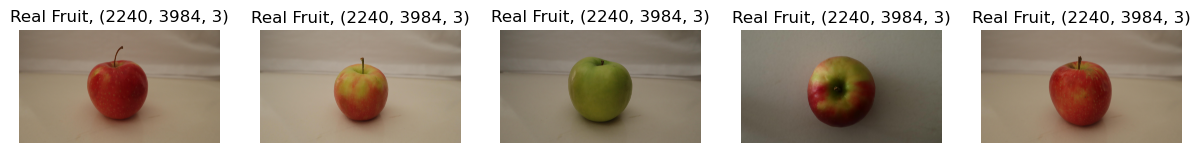

In [11]:
visualize_img(random_ai_fruit, "AI Fruit")
visualize_img(random_real_fruit, "Real Fruit")

## 4.4 - Mean Image Classes

In [12]:
def find_mean_img(image_filenames):
    # create an empty list to store the images
    images = []
    
    # loop over the image filenames
    for filename in image_filenames:
        # read the image and resize it to a fixed size
        img = cv2.imread(filename)
        img = cv2.resize(img, (128, 128))
        
        # convert the image to a numpy array and add it to the list
        img = np.array(img, dtype=np.float32)
        images.append(img)
    
    # calculate the mean of the images along the first axis (the image index)
    mean_image = np.mean(images, axis=0)
    
    # convert the mean image back to unsigned 8-bit integer format
    mean_image = np.array(mean_image, dtype=np.uint8)
    
    return mean_image

In [13]:
ai_mean = find_mean_img(ai_files)
real_mean = find_mean_img(real_files)

Text(0.5, 1.0, 'Real Fruit')

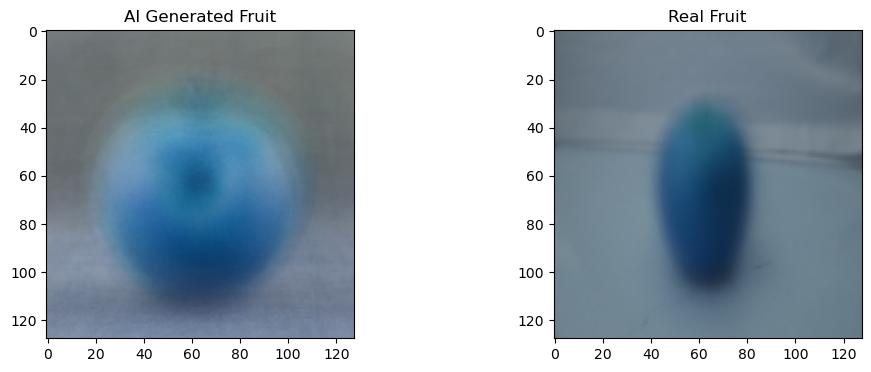

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].imshow(ai_mean)
ax[0].set_title("AI Generated Fruit")

ax[1].imshow(real_mean)
ax[1].set_title("Real Fruit")

# 5 - Feature Engineering

## 5.1 - Cropping Image

In [25]:
input_folder = "dataset/real/"
output_folder = "dataset/real_crop/"

for filename in os.listdir(input_folder):
     # Read the image
    image_path = os.path.join(input_folder, filename)
    image = cv2.imread(image_path)
    
    # Get the current shape of the image
    # current_shape = image.shape
    # print("Current shape of", filename, ":", current_shape)

    # Get the dimensions of the original image
    height, width = image.shape[:2]

    # New Shape
    # new_shape = (2048, 2048)
    # Calculate the starting coordinates for cropping
    start_x = (width - 2048) // 2
    start_y = (height - 2048) // 2

    # Resize the image
    # resized_image = cv2.resize(image, new_shape)
    # resized_shape = resized_image.shape
    # print("New shape of", filename, ":", resized_shape)
    
    # Crop the image
    cropped_image = image[start_y:start_y + 2048, start_x:start_x + 2048]

    # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

    # Create subplots
    # fig = make_subplots(rows=1, cols=2, subplot_titles=("Before Croping", "After Croping"))

    # Add images to subplots
    # fig.add_trace(go.Image(z=image_rgb), row=1, col=1)
    # fig.add_trace(go.Image(z=cropped_image_rgb), row=1, col=2)

    # Update layout
    # fig.update_layout(title=f"Image Crop Comparison - {real_files}")

    # Show the plot
    # fig.show()

    # Define output path
    output_path = os.path.join(output_folder, filename)
    # Save the cropped image
    cv2.imwrite(output_path, cropped_image)

    print(f"{filename} cropped and saved to {output_folder}")

green-apple-ohs-1.jpg cropped and saved to dataset/real_crop/
green-apple-ohs-10.jpg cropped and saved to dataset/real_crop/
green-apple-ohs-2.jpg cropped and saved to dataset/real_crop/
green-apple-ohs-3.jpg cropped and saved to dataset/real_crop/
green-apple-ohs-4.jpg cropped and saved to dataset/real_crop/
green-apple-ohs-5.jpg cropped and saved to dataset/real_crop/
green-apple-ohs-6.jpg cropped and saved to dataset/real_crop/
green-apple-ohs-7.jpg cropped and saved to dataset/real_crop/
green-apple-ohs-8.jpg cropped and saved to dataset/real_crop/
green-apple-ohs-9.jpg cropped and saved to dataset/real_crop/
green-apple-ss-1.jpg cropped and saved to dataset/real_crop/
green-apple-ss-10.jpg cropped and saved to dataset/real_crop/
green-apple-ss-11.jpg cropped and saved to dataset/real_crop/
green-apple-ss-12.jpg cropped and saved to dataset/real_crop/
green-apple-ss-13.jpg cropped and saved to dataset/real_crop/
green-apple-ss-14.jpg cropped and saved to dataset/real_crop/
green-ap

In [26]:
real_crop_files = glob.glob('dataset/real_crop/*')
random_real_crop_fruit = random_sample(real_crop_files)

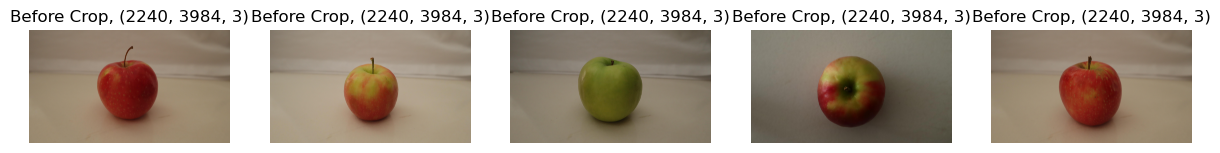

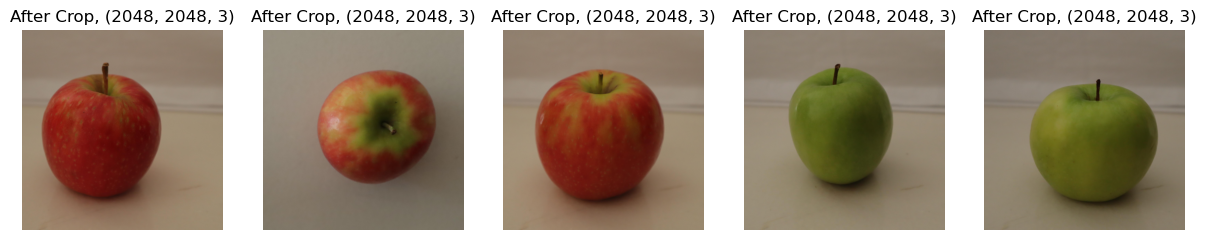

In [28]:
visualize_img(random_real_fruit, "Before Crop")
visualize_img(random_real_crop_fruit, "After Crop")

## 5.2 - Resize Image

In [39]:
def resize_images(input_folder, output_folder):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Loop through each image file in the input folder
    for filename in os.listdir(input_folder):
        # Read the image
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        # Resize the image to 128x128 pixels
        resized_image = cv2.resize(image, (128, 128))

        # Define output path
        output_path = os.path.join(output_folder, filename)

        # Save the resized image
        cv2.imwrite(output_path, resized_image)

In [37]:
# Define input and output folders
input_folder_1 = "dataset/ai/"
input_folder_2 = "dataset/real_crop/"
output_folder_1 = "dataset/ai_128/"
output_folder_2 = "dataset/real_128/"

In [40]:
# Resize AI images
resize_images(input_folder_1, output_folder_1)

# Resize Real images
resize_images(input_folder_2, output_folder_2)

In [41]:
ai_128_files = glob.glob('dataset/ai_128/*')
real_128_files = glob.glob('dataset/real_128/*')
random_ai_128 = random_sample(ai_128_files)
random_real_128 = random_sample(real_128_files)

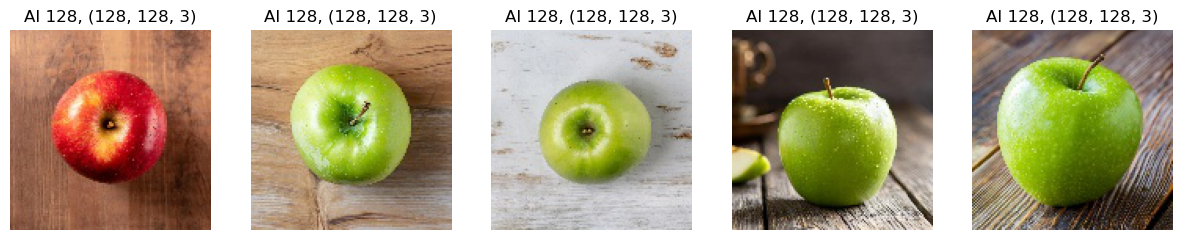

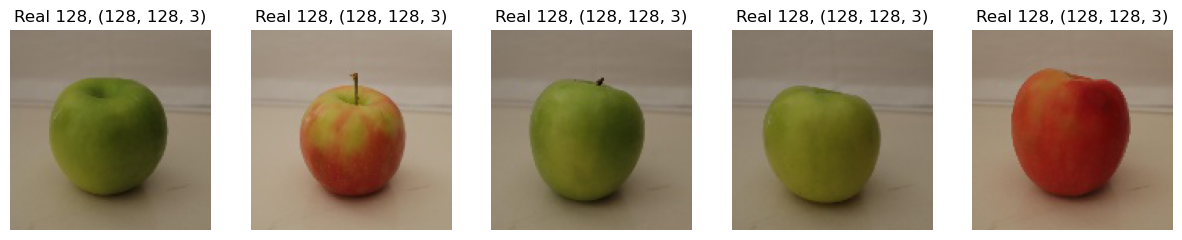

In [42]:
visualize_img(random_ai_128, "AI 128")
visualize_img(random_real_128, "Real 128")

## 5.3 - Split Between X and y

In [43]:
img_paths = []
directories = ['dataset/ai_128/', 'dataset/real_128/']

for folder in directories:
    for img_path in os.listdir(folder):
        if folder == 'dataset/ai_128/':
            label = 'ai_fruit'
        else:
            label = 'real_fruit'

        img_paths.append([folder + img_path, label])

In [44]:
X = np.array([cv2.imread(img_path[0]) for img_path in img_paths]) / 255.0
y_label = np.array([label[1] for label in img_paths])

In [56]:
encoded_y = []
for label in y_label:
    # labels will be encoded as such: 0 = AI generated fruit, 1 = real fruit
    if label == 'ai_fruit':
        encoded_y.append(0)
    else:
        encoded_y.append(1)

y_encoded = np.array(encoded_y)
y = to_categorical(y=y_encoded, num_classes=3)

In [57]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Categorical labels shape: {y_label.shape}")
print(f"Encoded Categorical labels shape: {y_encoded.shape}")

X shape: (306, 128, 128, 3)
y shape: (306, 3)
Categorical labels shape: (306,)
Encoded Categorical labels shape: (306,)


## 5.4 - Split into Train-set, Validation-set and Test-set

In [62]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.25, random_state=21, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.25, random_state=21, shuffle=True)

print(f"Training data: {X_train.shape},  labels: {y_train.shape}")
print(f"Validation data: {X_val.shape},  labels: {y_val.shape}")
print(f"Testing data: {X_test.shape},  labels: {y_test.shape}")

Training data: (229, 128, 128, 3),  labels: (229, 3)
Validation data: (57, 128, 128, 3),  labels: (57, 3)
Testing data: (20, 128, 128, 3),  labels: (20, 3)


In [63]:
unique_rows, counts = np.unique(y_train, axis=0, return_counts=True)

print("Unique y_train rows:\n", unique_rows)
print("Counts:\n", counts)

unique_rows, counts = np.unique(y_val, axis=0, return_counts=True)

print("Unique y_val rows:\n", unique_rows)
print("Counts:\n", counts)

unique_rows, counts = np.unique(y_test, axis=0, return_counts=True)

print("Unique y_test rows:\n", unique_rows)
print("Counts:\n", counts)

Unique y_train rows:
 [[0. 1. 0.]
 [1. 0. 0.]]
Counts:
 [114 115]
Unique y_val rows:
 [[0. 1. 0.]
 [1. 0. 0.]]
Counts:
 [31 26]
Unique y_test rows:
 [[0. 1. 0.]
 [1. 0. 0.]]
Counts:
 [11  9]


## 5.5 - Data Augmentation

In [64]:
def data_augmentation(image, label):
    # Apply random rotations, shifts, and flips to the image
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.5)
    image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
    return image, label

## 5.6 - Tensorflow Pipeline

### 5.6.1 - Pipeline without Data Augmentation

In [65]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(len(y_train)).batch(128).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(128)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(128)

### 5.6.2 - Pipeline with Data Augmentation

In [66]:
train_pipe_aug = tf.data.Dataset.from_tensor_slices((X_train, y_train)) # 1
train_pipe_aug = train_pipe_aug.map(data_augmentation) # 2
train_pipe_aug = train_pipe_aug.shuffle(buffer_size=len(y_train)) # 3
train_pipe_aug = train_pipe_aug.batch(batch_size=128) # 4
train_pipe_aug = train_pipe_aug.prefetch(buffer_size=tf.data.AUTOTUNE) # 5

# 6 - First Model

In [98]:
checkpoint_filepath_1 = 'best_model_1.h5'

checkpoint_callback_1 = ModelCheckpoint(
    filepath=checkpoint_filepath_1,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

## 6.1 - First Model without Augmentation

### 6.1.1 - Model Definition

In [110]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [111]:
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from keras.models import Model

input_dim = (128, 128, 3) # example input shape
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

input_ = Input(shape=input_dim)

flatten_layer = Flatten()(input_)

dense_layer_1 = Dense(64, activation='relu')(flatten_layer)
dense_layer_2 = Dense(32, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(16, activation='relu')(dense_layer_2)

output_layer = Dense(3, activation='sigmoid')(dense_layer_3)

model_1 = Model(input_, output_layer)

model_1.compile(optimizer=optimizer, loss=loss_function, metrics=['Precision', 'accuracy'])
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 64)                3145792   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 3148451 (12.01 MB)
Trainable params: 3148451 (1

### 6.1.2 - Model Training

In [112]:
# Train the Model
history_1 = model_1.fit(train_pipe, epochs=40, validation_data=val_pipe, callbacks=[checkpoint_callback_1])

Epoch 1/40


1/2 [==============>...............] - ETA: 0s - loss: 0.7028 - precision: 0.2217 - accuracy: 0.1172
Epoch 1: val_loss did not improve from 0.01164
2/2 [==============================] - 1s 182ms/step - loss: 1.7396 - precision: 0.2217 - accuracy: 0.3057 - val_loss: 3.5324 - val_precision: 0.4561 - val_accuracy: 0.4561
Epoch 2/40
1/2 [==============>...............] - ETA: 0s - loss: 3.1842 - precision: 0.5078 - accuracy: 0.5078
Epoch 2: val_loss did not improve from 0.01164
2/2 [==============================] - 0s 51ms/step - loss: 2.5097 - precision: 0.5078 - accuracy: 0.5022 - val_loss: 1.3611 - val_precision: 0.0000e+00 - val_accuracy: 0.4561
Epoch 3/40
1/2 [==============>...............] - ETA: 0s - loss: 1.3081 - precision: 0.0000e+00 - accuracy: 0.5000
Epoch 3: val_loss did not improve from 0.01164
2/2 [==============================] - 0s 52ms/step - loss: 1.3570 - precision: 0.5050 - accuracy: 0.5022 - val_loss: 1.6262 - val_precision: 0.2281 - val_accuracy: 0.4561
Epoch 4/4

In [113]:
model_1.trainable = False
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 64)                3145792   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 3148451 (12.01 MB)
Trainable params: 0 (0.00 By

In [114]:
# Save Model
model_1.save('load_model_1.h5')

### 6.1.3 - Model Evaluation

In [116]:
history_1_df = pd.DataFrame(history_1.history)
history_1_df.head()

,loss,precision,accuracy,val_loss,val_precision,val_accuracy
0,1.739561,0.221675,0.305677,3.532356,0.456140,0.456140
1,2.509714,0.507812,0.502183,1.361074,0.000000,0.456140
2,1.357010,0.504951,0.502183,1.626217,0.228070,0.456140
3,1.157050,0.344512,0.502183,0.871697,0.000000,0.491228
4,0.849832,0.000000,0.576419,0.642366,0.266667,0.385965


<Axes: >

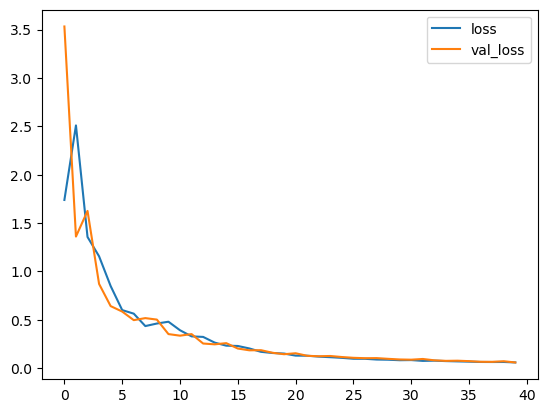

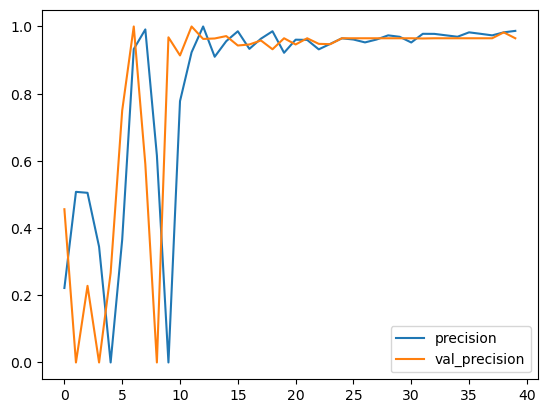

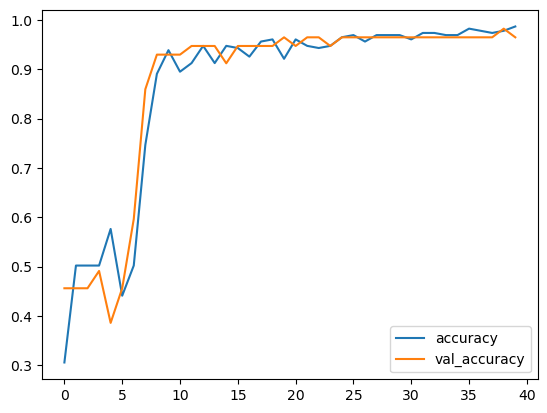

In [117]:
history_1_df[['loss', 'val_loss']].plot()
history_1_df[['precision', 'val_precision']].plot()
history_1_df[['accuracy', 'val_accuracy']].plot()

#### 6.1.3.1 - Model Evaluation (All Epoch)

In [118]:
load_model_1 = load_model("load_model_1.h5")

In [119]:
# Predict Train and test set
# y_pred_train_lg = model_logreg.predict(X_train_final)
# y_pred_test_lg = model_logreg.predict(X_test_final)

print(classification_report(y_test.argmax(axis = 1), load_model_1.predict(X_test).argmax(axis = 1)))

1/1 [==============================] - 0s 50ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



1/1 [==============================] - 0s 27ms/step


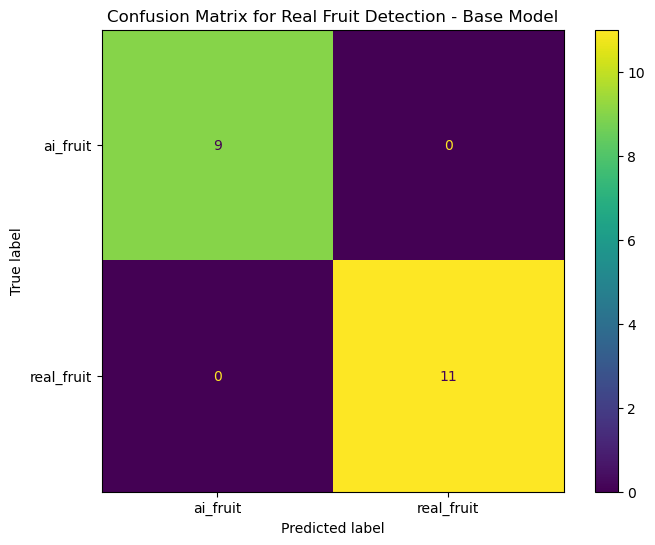

In [144]:
# Calculate confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), load_model_1.predict(X_test).argmax(axis=1))

# Create confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ai_fruit', 'real_fruit'])

# Set size and add title to plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
ax.set_title('Confusion Matrix for Real Fruit Detection - Base Model')

plt.show()

#### 6.1.3.2 - Model Evaluation (Best Model)

In [122]:
best_load_model_1 = load_model("best_model_1.h5")

In [123]:
print(classification_report(y_test.argmax(axis = 1), best_load_model_1.predict(X_test).argmax(axis = 1)))

1/1 [==============================] - 0s 55ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



1/1 [==============================] - 0s 21ms/step


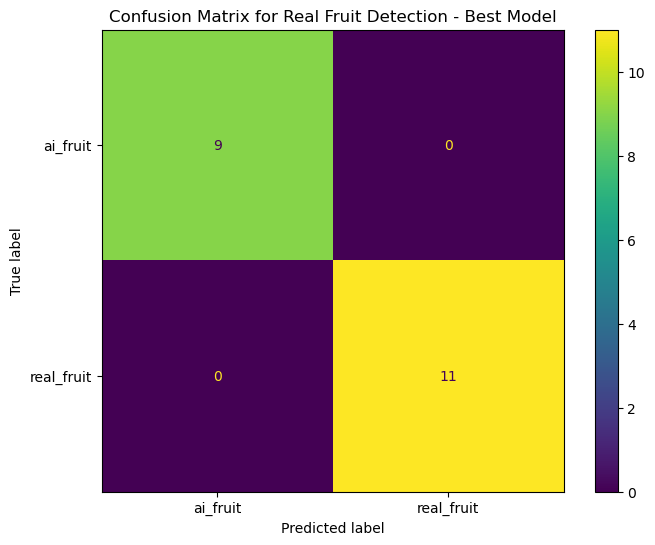

In [145]:
# Calculate confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), best_load_model_1.predict(X_test).argmax(axis=1))

# Create confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ai_fruit', 'real_fruit'])

# Set size and add title to plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
ax.set_title('Confusion Matrix for Real Fruit Detection - Best Model')

plt.show()

## 6.2 - First Model with Augmentation

In [125]:
checkpoint_filepath_1_aug = 'best_model_1_aug.h5'

checkpoint_callback_1_aug = ModelCheckpoint(
    filepath=checkpoint_filepath_1_aug,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

### 6.2.1 - Model Definition

In [126]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [127]:
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from keras.models import Model

input_dim = (128, 128, 3) # example input shape
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

input_ = Input(shape=input_dim)

flatten_layer = Flatten()(input_)

dense_layer_1 = Dense(64, activation='relu')(flatten_layer)
dense_layer_2 = Dense(32, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(16, activation='relu')(dense_layer_2)

output_layer = Dense(3, activation='sigmoid')(dense_layer_3)

model_1_aug = Model(input_, output_layer)

model_1_aug.compile(optimizer=optimizer, loss=loss_function, metrics=['Precision', 'accuracy'])
model_1_aug.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 64)                3145792   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 3148451 (12.01 MB)
Trainable params: 3148451 (1

### 6.2.2 - Model Training

In [128]:
# Train the Model
history_1_aug = model_1_aug.fit(train_pipe_aug, epochs=50, validation_data=val_pipe, callbacks=[checkpoint_callback_1_aug])

Epoch 1/50
1/2 [==============>...............] - ETA: 0s - loss: 0.6966 - precision: 0.4296 - accuracy: 0.4531
Epoch 1: val_loss improved from inf to 1.40321, saving model to best_model_1_aug.h5
2/2 [==============================] - 1s 204ms/step - loss: 1.4779 - precision: 0.4529 - accuracy: 0.4803 - val_loss: 1.4032 - val_precision: 0.0000e+00 - val_accuracy: 0.5439
Epoch 2/50
1/2 [==============>...............] - ETA: 0s - loss: 1.6276 - precision: 0.3158 - accuracy: 0.4844
Epoch 2: val_loss improved from 1.40321 to 0.41942, saving model to best_model_1_aug.h5
2/2 [==============================] - 0s 102ms/step - loss: 1.1571 - precision: 0.5259 - accuracy: 0.5109 - val_loss: 0.4194 - val_precision: 0.6235 - val_accuracy: 0.4561
Epoch 3/50
1/2 [==============>...............] - ETA: 0s - loss: 0.4669 - precision: 0.5976 - accuracy: 0.6094
Epoch 3: val_loss improved from 0.41942 to 0.40239, saving model to best_model_1_aug.h5
2/2 [==============================] - 0s 101ms/step -

In [129]:
model_1_aug.trainable = False
model_1_aug.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 64)                3145792   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 3148451 (12.01 MB)
Trainable params: 0 (0.00 By

In [130]:
# Save Model
model_1_aug.save('load_model_1_aug.h5')

### 6.2.3 - Model Evaluation

In [132]:
history_1_aug_df = pd.DataFrame(history_1_aug.history)
history_1_aug_df.head()

,loss,precision,accuracy,val_loss,val_precision,val_accuracy
0,1.477868,0.452926,0.480349,1.403214,0.000000,0.543860
1,1.157146,0.525862,0.510917,0.419418,0.623529,0.456140
2,0.425119,0.690566,0.742358,0.402388,0.735294,0.491228
3,0.451335,0.738693,0.716157,0.386227,0.690141,0.754386
4,0.501817,0.664336,0.733624,0.285209,0.975610,0.859649


<Axes: >

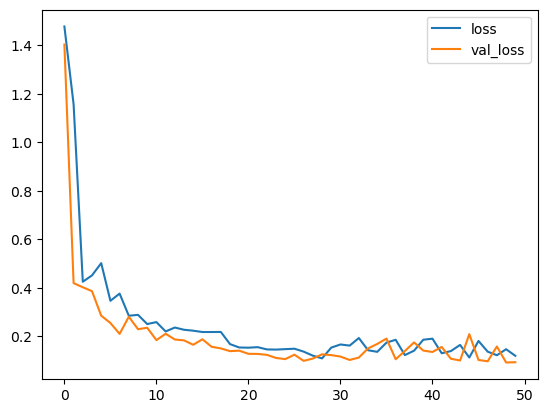

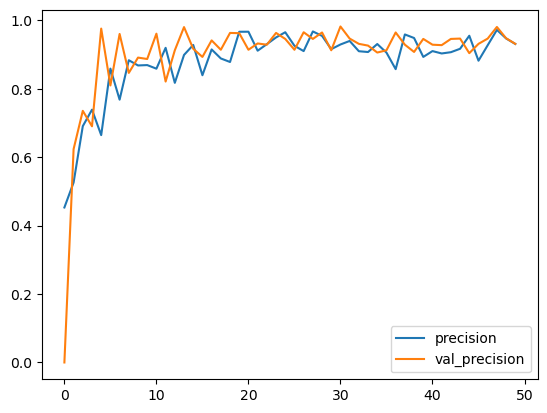

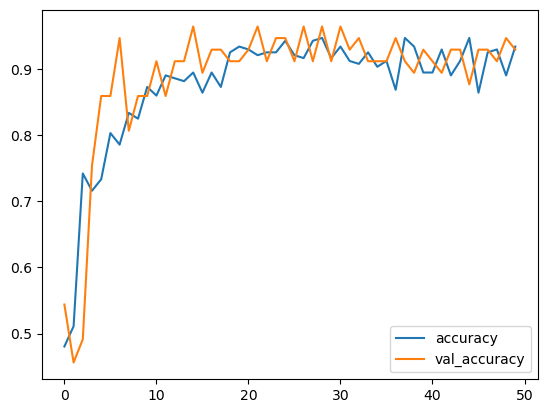

In [133]:
history_1_aug_df[['loss', 'val_loss']].plot()
history_1_aug_df[['precision', 'val_precision']].plot()
history_1_aug_df[['accuracy', 'val_accuracy']].plot()

#### 6.2.3.1 - Model Evaluation (All Epoch)

In [134]:
load_model_1_aug = load_model("load_model_1_aug.h5")

In [135]:
print(classification_report(y_test.argmax(axis = 1), load_model_1_aug.predict(X_test).argmax(axis = 1)))

1/1 [==============================] - 0s 51ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



1/1 [==============================] - 0s 27ms/step


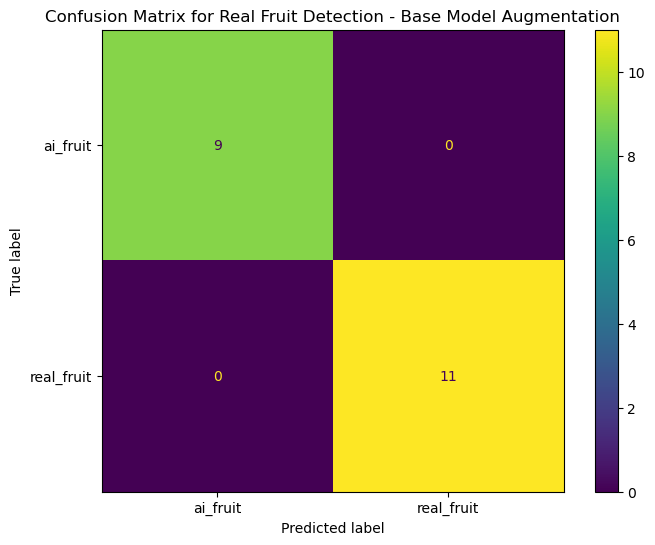

In [142]:
# Calculate confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), load_model_1_aug.predict(X_test).argmax(axis=1))

# Create confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ai_fruit', 'real_fruit'])

# Set size and add title to plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
ax.set_title('Confusion Matrix for Real Fruit Detection - Base Model Augmentation')

plt.show()

#### 6.2.3.2 - Model Evaluation (Best Model)

In [137]:
best_load_model_1_aug = load_model("best_model_1_aug.h5")

In [138]:
print(classification_report(y_test.argmax(axis = 1), best_load_model_1_aug.predict(X_test).argmax(axis = 1)))

1/1 [==============================] - 0s 57ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



1/1 [==============================] - 0s 22ms/step


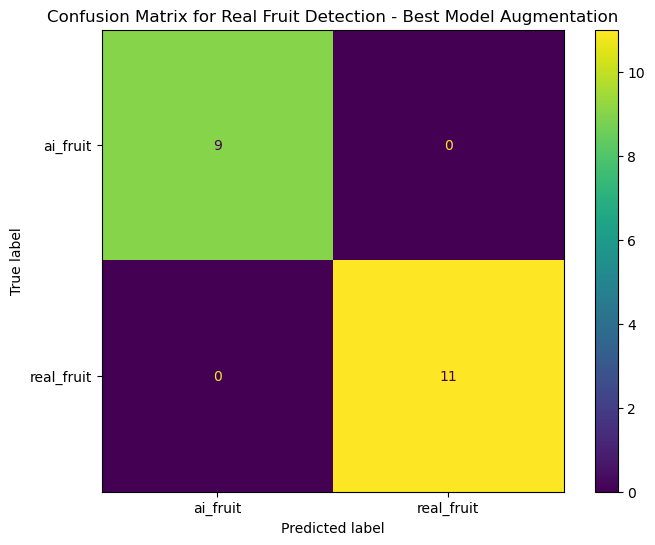

In [143]:
# Calculate confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), best_load_model_1_aug.predict(X_test).argmax(axis=1))

# Create confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ai_fruit', 'real_fruit'])

# Set size and add title to plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
ax.set_title('Confusion Matrix for Real Fruit Detection - Best Model Augmentation')

plt.show()

# 7 - Model Analysis